In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import pandas as pd

In [2]:
datosFull = pd.read_csv('USArrests.csv')
datosNum = datosFull[['Murder','Assault','UrbanPop','Rape']]

In [3]:
normalizado = np.subtract(datosNum,np.mean(datosNum))
normalizado = np.divide(normalizado,np.std(normalizado))

In [4]:
matriz_cov = np.cov(normalizado.T)
autoval, autovec = la.eig(matriz_cov)
autovec = autovec.T
orden = np.argsort(autoval)
autoval = autoval[orden]
autovec = autovec[orden]

In [5]:
PCL_1 = autovec[-1]
PCL_2 = -autovec[-2]

headers = datosNum.columns
valores = normalizado.values

print(PCL_1,PCL_2)

[0.53589947 0.58318363 0.27819087 0.54343209] [-0.41818087 -0.1879856   0.87280619  0.16731864]


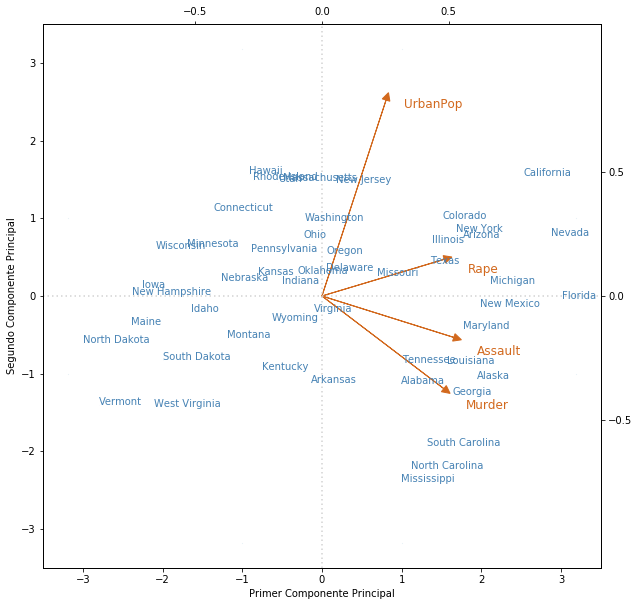

In [6]:
fig, ax1 = plt.subplots(figsize=(10,10))

#print(PCL_1,PCL_2)

for i in range(len(valores)):   
    x = np.dot(PCL_1,valores[i])
    y = np.dot(PCL_2,valores[i])
    ax1.text(x,y,datosFull['Unnamed: 0'][i],color="steelblue")
    ax1.scatter(x,y,s=0.0001)
    
for i in range(PCL_1.size):
    x = PCL_1[i]*3
    y = PCL_2[i]*3
    ax1.arrow(0,0,x,y, length_includes_head=True,head_width=0.1,head_length=0.1,fc="chocolate",ec="chocolate",color="chocolate")
    ax1.annotate(headers[i],xy=(x+0.2,y-0.2),fontsize=12,color="chocolate")


ax1.set_ylim(-3.5,3.5)
ax1.set_xlim(-3.5,3.5)
ax1.axhline(0,color='lightgray',dashes=(1,1,0,1))
ax1.axvline(0,color='lightgray',dashes=(1,1,0,1))

ax1.set_xlabel('Primer Componente Principal')
ax1.set_ylabel('Segundo Componente Principal')

ax2 = ax1.twinx()
ax2.scatter([-1,-1,1,1],[-1,1,-1,1],s=0.001)
ax2.yaxis.set_ticks([-0.5,0,0.5])

ax2 = ax1.twiny()
ax2.scatter([-1,-1,1,1],[-1,1,-1,1],s=0.001)
ax2.xaxis.set_ticks([-0.5,0,0.5])